In [34]:
import pandas as pd
import numpy as np
import env
import wrangle
import matplotlib.pyplot as plt

In [11]:
customers = pd.read_sql("SELECT customer_id, monthly_charges, tenure, total_charges FROM customers WHERE contract_type_id = 2", env.get_db_url('telco_churn'))


In [12]:
customers.head()

,customer_id,monthly_charges,tenure,total_charges
0,0002-ORFBO,65.60,9,593.3
1,0020-JDNXP,61.25,34,1993.2
2,0022-TCJCI,62.70,45,2791.5
3,0023-UYUPN,25.20,50,1306.3
4,0036-IHMOT,103.70,55,5656.75


In [14]:
customers.tail()

,customer_id,monthly_charges,tenure,total_charges
1468,9968-FFVVH,68.80,63,4111.35
1469,9972-VAFJJ,94.00,53,4871.45
1470,9978-HYCIN,84.95,47,4018.05
1471,9979-RGMZT,94.05,7,633.45
1472,9987-LUTYD,55.15,13,742.9


In [15]:
customers.describe()

,monthly_charges,tenure
count,1473.000000,1473.000000
mean,65.048608,42.044807
std,31.840539,19.035883
min,18.250000,0.000000
25%,26.900000,27.000000
50%,68.750000,44.000000
75%,94.800000,58.000000
max,118.600000,72.000000


In [16]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 4 columns):
customer_id        1473 non-null object
monthly_charges    1473 non-null float64
tenure             1473 non-null int64
total_charges      1473 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 46.2+ KB


In [18]:
customers.shape

(1473, 4)

In [20]:
customers.sort_values(by="total_charges")

,customer_id,monthly_charges,tenure,total_charges
432,2923-ARZLG,19.70,0,
1047,7009-PCARS,19.10,55,1001.5
1305,8859-YSTWS,19.95,48,1004.5
598,4163-HFTUK,19.10,51,1007.8
1170,7872-BAAZR,19.55,53,1007.9
...,...,...,...,...
1389,9451-WLYRI,19.05,53,990.45
111,0804-YGEQV,24.45,43,993.15
1095,7297-DVYGA,19.85,51,996.95
1222,8249-THVEC,19.40,51,997.75


In [22]:
print(customers.isnull().sum())

customer_id        0
monthly_charges    0
tenure             0
total_charges      0
dtype: int64


In [24]:
customers.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [25]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 4 columns):
customer_id        1473 non-null object
monthly_charges    1473 non-null float64
tenure             1473 non-null int64
total_charges      1472 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 46.2+ KB


In [28]:
customers = customers.dropna()

In [29]:
customers['total_charges'] = customers.total_charges.astype('float') 

In [31]:
customers.describe()

,monthly_charges,tenure,total_charges
count,1472.000000,1472.00000,1472.000000
mean,65.079416,42.07337,3034.683084
std,31.829391,19.01075,2229.730075
min,18.250000,1.00000,18.800000
25%,28.812500,27.00000,989.350000
50%,68.750000,44.00000,2657.550000
75%,94.812500,58.00000,4859.525000
max,118.600000,72.00000,8684.800000


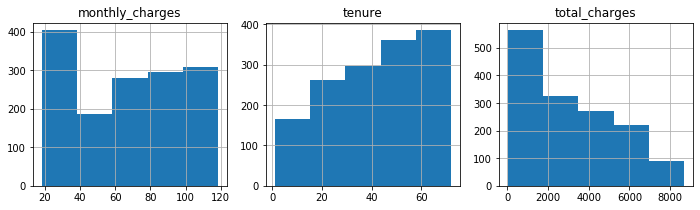

In [35]:
plt.figure(figsize=(16, 3))

for i, col in enumerate(['monthly_charges', 'tenure', 'total_charges']):  
    plot_number = i + 1 # i starts at 0, but plot nos should start at 1
    series = customers[col]  
    plt.subplot(1,4, plot_number)
    plt.title(col)
    series.hist(bins=5)

In [10]:
wrangle_telco()

,customer_id,monthly_charges,tenure,total_charges
0,0002-ORFBO,65.60,9,593.30
1,0020-JDNXP,61.25,34,1993.20
2,0022-TCJCI,62.70,45,2791.50
3,0023-UYUPN,25.20,50,1306.30
4,0036-IHMOT,103.70,55,5656.75
...,...,...,...,...
1468,9968-FFVVH,68.80,63,4111.35
1469,9972-VAFJJ,94.00,53,4871.45
1470,9978-HYCIN,84.95,47,4018.05
1471,9979-RGMZT,94.05,7,633.45
